
## Current Health Expenditure (CHE) In million constant (2022) US$


StatementMeta(ghparkcluster, 47, 2, Finished, Available, Finished)

+-------------------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Indicators                                                               |2000  |2001  |2002  |2003  |2004  |2005  |2006  |2007  |2008  |2009  |2010  |2011  |2012  |2013  |2014  |2015  |2016  |2017  |2018  |2019  |2020  |2021  |2022  |
+-------------------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Current health expenditure by revenues of health care financing schemes  |157882|168633|181476|191934|202928|209876|218748|230046|236950|246200|250221|253247|259598|266565|273011|277190|280482|283055|291161|302490|325950|355811|341370|
|Transfers from government domestic revenue (allocat

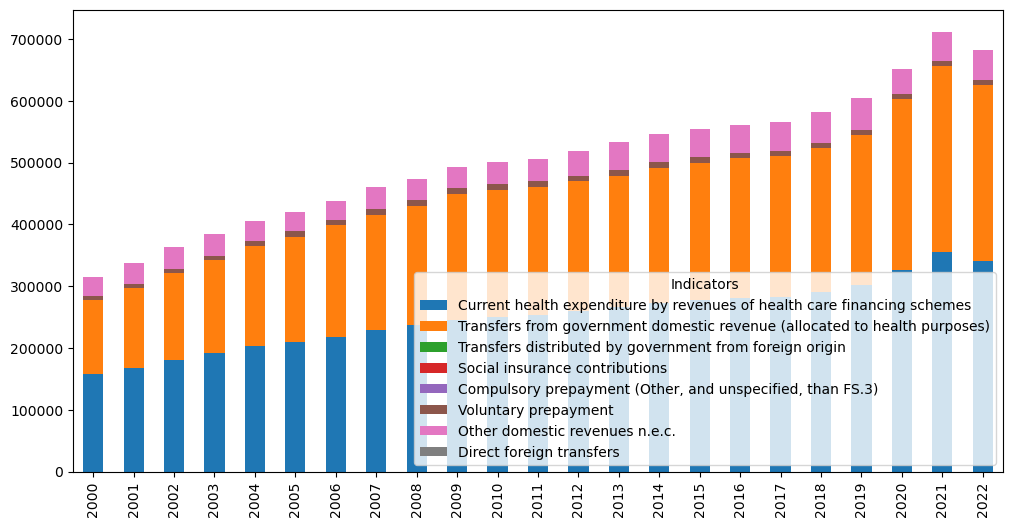

In [1]:
%%pyspark

import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`nhaindicators`")

#df = spark.read.load('abfss://healthdata-fs@distributedanalytics.dfs.core.windows.net/data/Current Health Expenditure (CHE) as % Gross Domestic Product (GDP).csv', format='csv'
## If header exists uncomment line below
#, header=True
#)

# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[2]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 
df.show(truncate=False)


# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]

# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

df_transposed = pandas_df.set_index('Indicators').T

df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.show()



## Current Health Expenditure (CHE) -In million constant (2022) US$ ( Standarised based on USD 2022 to accomodate Inflation)- revenue from health care financilin schemes

StatementMeta(ghparkcluster, 47, 3, Finished, Available, Finished)

+----------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Indicators                                                      |2000  |2001  |2002  |2003  |2004  |2005  |2006  |2007  |2008  |2009  |2010  |2011  |2012  |2013  |2014  |2015  |2016  |2017  |2018  |2019  |2020  |2021  |2022  |2023  |
+----------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Current Health Expenditure (CHE) -In million constant (2022) US$|157882|168633|181476|191934|202928|209876|218748|230046|236950|246200|250221|253247|259598|266565|273011|277190|280482|283055|291161|302490|325950|355811|341370|336329|
+-----------------------------------------------------------

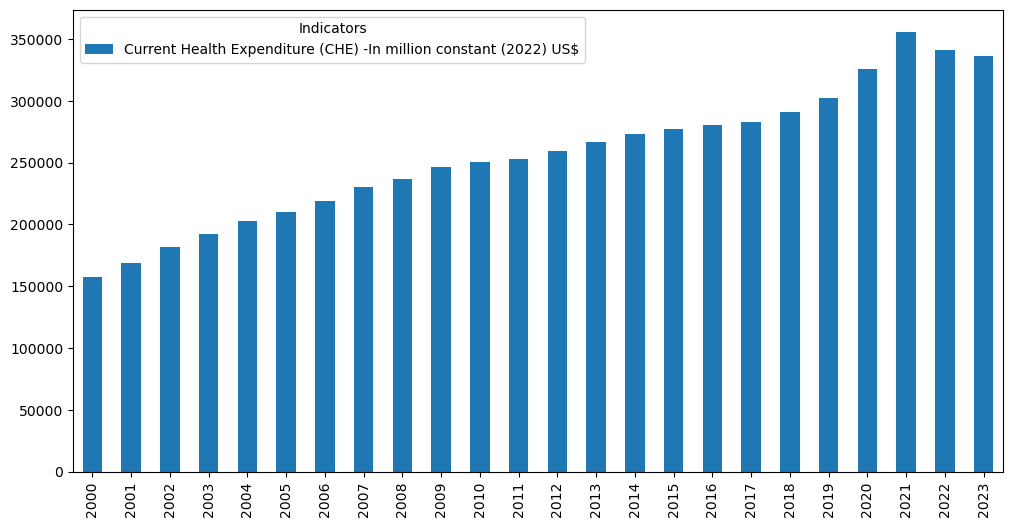

In [2]:
%%pyspark

import pandas as pd
import matplotlib.pyplot as plt

#df = spark.read.load('abfss://healthdata-fs@distributedanalytics.dfs.core.windows.net/data/CHE_In million constant_2022_USD.csv', format='csv'
## If header exists uncomment line below
#, header=True
#)
df = spark.sql("SELECT * FROM `default`.`cheinmillionconstant2022usd`")

df.show(truncate=False)

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]

# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

df_transposed = pandas_df.set_index('Indicators').T

df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.show()

EDA NHS FUNDING SOURCES

StatementMeta(ghparkcluster, 47, 4, Finished, Available, Finished)

+-------------------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Indicators                                                               |2000  |2001  |2002  |2003  |2004  |2005  |2006  |2007  |2008  |2009  |2010  |2011  |2012  |2013  |2014  |2015  |2016  |2017  |2018  |2019  |2020  |2021  |2022  |
+-------------------------------------------------------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Current health expenditure by revenues of health care financing schemes  |157882|168633|181476|191934|202928|209876|218748|230046|236950|246200|250221|253247|259598|266565|273011|277190|280482|283055|291161|302490|325950|355811|341370|
|Transfers from government domestic revenue (allocat

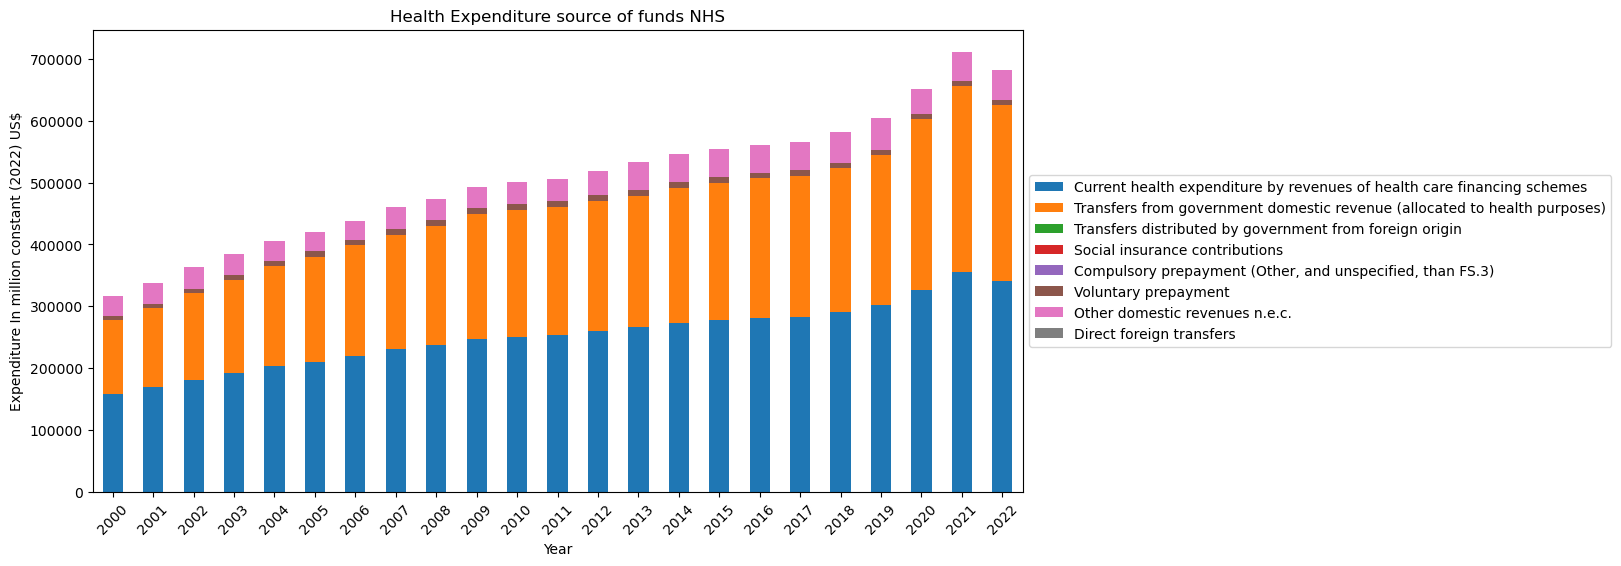

In [3]:
%%pyspark
from pyspark.sql.functions import monotonically_increasing_id,col, struct, when, isnan, cast 
import pandas as pd
import matplotlib.pyplot as plt


df = spark.sql("SELECT * FROM `default`.`nhaindicators`")

# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[2]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 
df.show(truncate=False)

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]


# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

df_transposed = pandas_df.set_index('Indicators').T

df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize plot
plt.title('Health Expenditure source of funds NHS')
plt.xlabel('Year')
plt.ylabel('Expenditure In million constant (2022) US$')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## CHE - Current Health Expenses as percentage of GDP

StatementMeta(ghparkcluster, 47, 5, Finished, Available, Finished)

+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|          Indicators|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023|
+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Current Health Ex...|   7|   7|   8|   8|   8|   8|   9|   9|   9|  10|  10|  10|  10|  10|  10|  10|  10|  10|  10|  10|  12|  12|  11|  11|
+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+



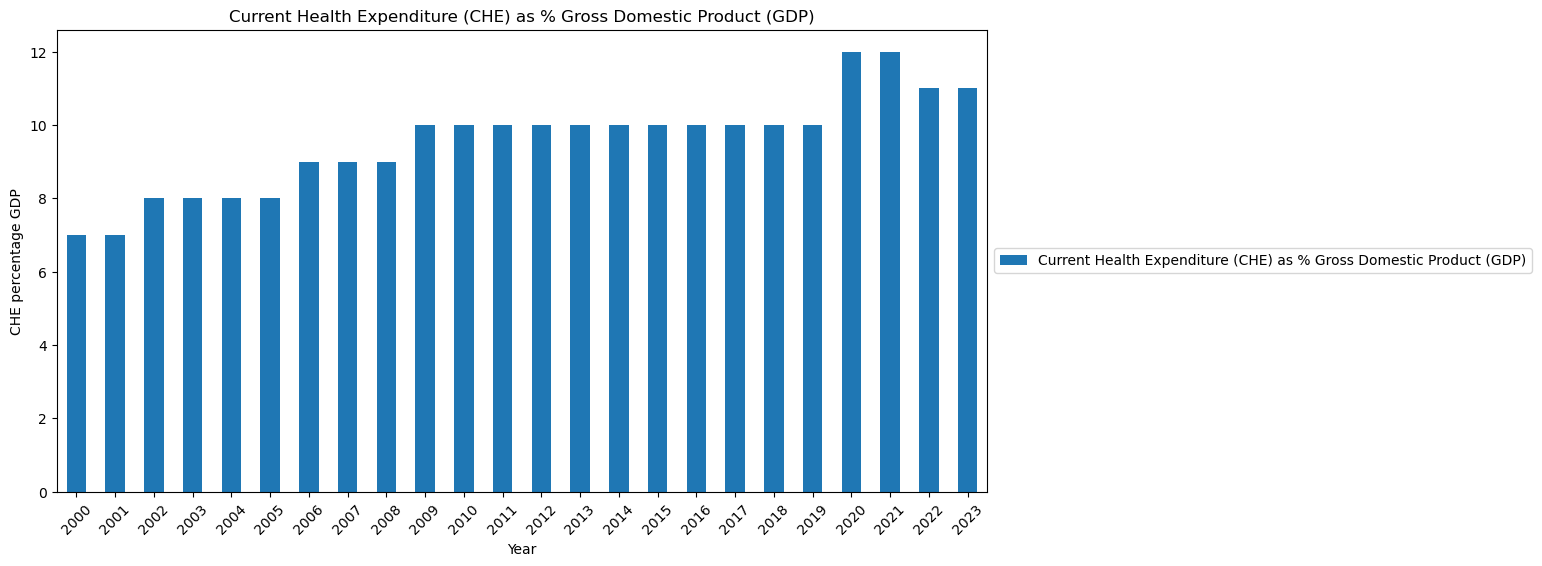

In [4]:
%%pyspark

import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`cheaspercentgdp`")
df.show(10)

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]


# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

df_transposed = pandas_df.set_index('Indicators').T

df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize plot
plt.title('Current Health Expenditure (CHE) as % Gross Domestic Product (GDP)')
plt.xlabel('Year')
plt.ylabel('CHE percentage GDP')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## CHE per capita USD

StatementMeta(ghparkcluster, 47, 6, Finished, Available, Finished)

+--------------------+-------------------+--------------------+------+-------+--------------------+
|           Indicator|SpatialDimValueCode|            Location|Period|  Value|        DateModified|
+--------------------+-------------------+--------------------+------+-------+--------------------+
|Current health ex...|                GBR|United Kingdom of...|  2000|2027.64|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2001|2083.99|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2002|2374.82|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2003|2789.35|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2004|3377.12|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2005|3547.29|2024-12-10T00:00:...|
|Current health ex...|                GBR|United Kingdom of...|  2006|3817.99|2024-12-10T00:00:...|


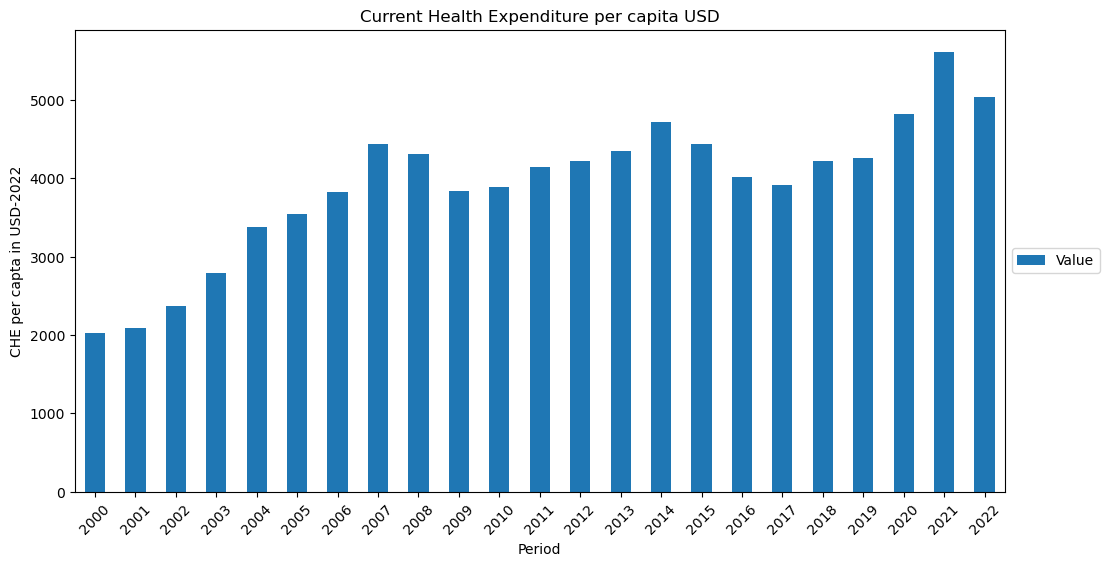

In [5]:
%%pyspark
import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`chepercapitausd`where SpatialDimValueCode='GBR' order by Period  ")

df.show(25)


# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[1], df.columns[2],df.columns[5]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 

df.show(25)

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]


# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

#df_transposed = pandas_df.set_index('Indicators').T
##

pandas_df = pandas_df.set_index('Period')


pandas_df.plot(kind='bar', stacked=True, figsize=(12, 6))


# Customize plot
plt.title('Current Health Expenditure per capita USD')
plt.xlabel('Period')
plt.ylabel('CHE per capta in USD-2022')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Doctors in UK - https://www.who.int/data/gho/data/indicators

StatementMeta(ghparkcluster, 47, 7, Finished, Available, Finished)

+------+----------------+
|Period|FactValueNumeric|
+------+----------------+
|  2000|       117332.00|
|  2001|       120709.00|
|  2002|       125451.00|
|  2003|       131272.00|
|  2004|       139846.00|
|  2005|       145413.00|
|  2006|       149558.00|
|  2007|       152679.00|
|  2008|       158736.00|
|  2009|       165109.00|
|  2010|       166674.00|
|  2011|       170317.00|
|  2012|       172069.00|
|  2013|       173985.00|
|  2014|       177620.00|
|  2015|       180888.00|
|  2016|       182737.00|
|  2017|       185921.00|
|  2018|       188783.00|
|  2019|       196784.00|
|  2020|       203907.00|
|  2021|       213839.00|
|  2022|       214287.00|
|  2023|       226725.00|
+------+----------------+



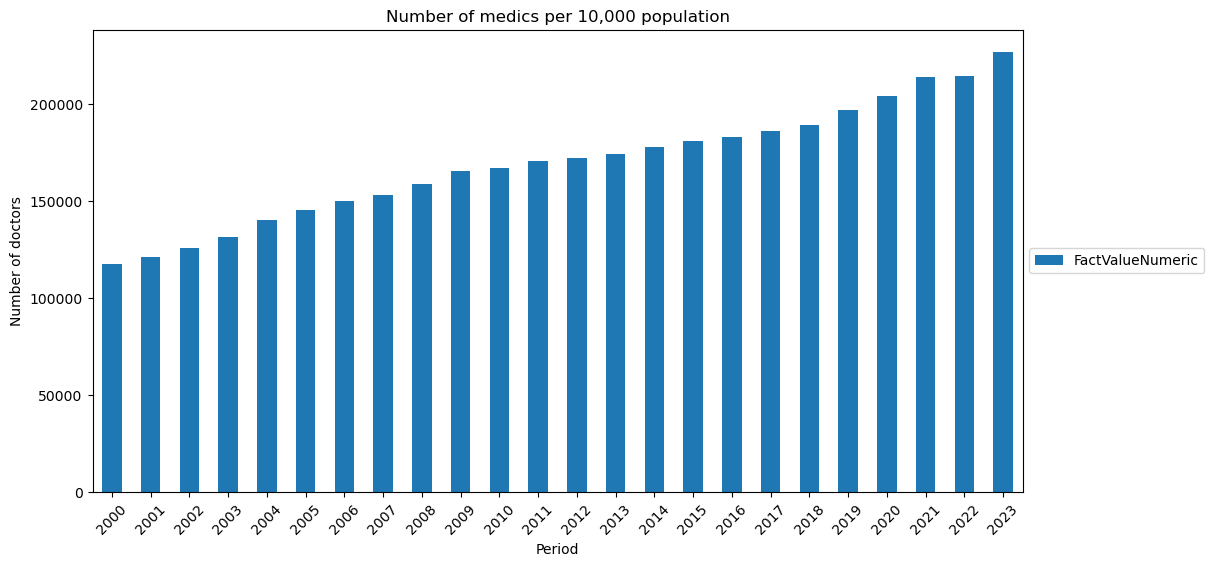

In [6]:
%%pyspark
import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`doctorsuk` where SpatialDimValueCode = 'GBR'  and IndicatorCode = 'HWF_0002' and Period > 1999 order by Period")



# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[1], df.columns[2],df.columns[3],df.columns[4],df.columns[6],df.columns[8],df.columns[9]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 

df.show(100)

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]


# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

#df_transposed = pandas_df.set_index('Indicators').T
##

pandas_df = pandas_df.set_index('Period')

pandas_df.plot(kind='bar', stacked=True, figsize=(12, 6))


# Customize plot
plt.title('Number of medics per 10,000 population')
plt.xlabel('Period')
plt.ylabel('Number of doctors')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## General government expenditure (GGE)-In million constant (2022) US$

StatementMeta(ghparkcluster, 47, 8, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7d3a2dd4-8a0d-4746-b7ba-614afb73106c)

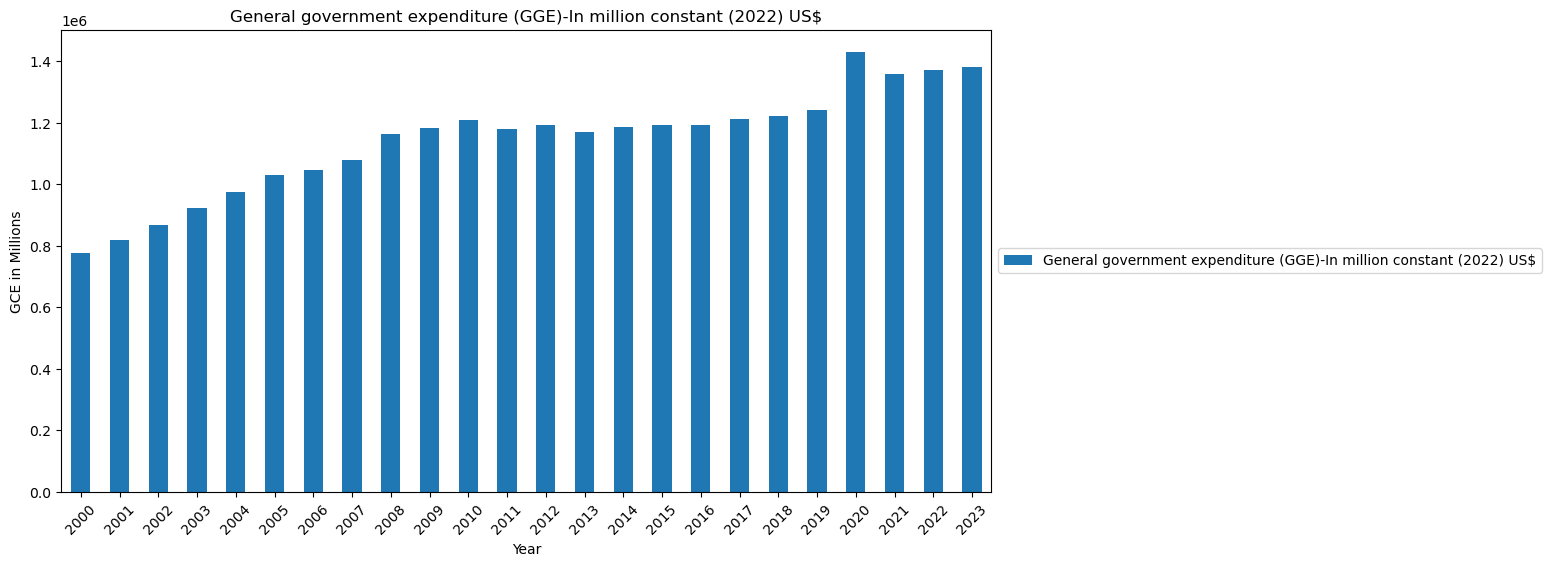

In [7]:
%%pyspark

import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`gceinmillionconstant2022usd`")
# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]


# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

df_transposed = pandas_df.set_index('Indicators').T

display(df_transposed)

df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))


# Customize plot
plt.title('General government expenditure (GGE)-In million constant (2022) US$')
plt.xlabel('Year')
plt.ylabel('GCE in Millions')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Worldbank data - gDP per capita

StatementMeta(ghparkcluster, 47, 9, Finished, Available, Finished)

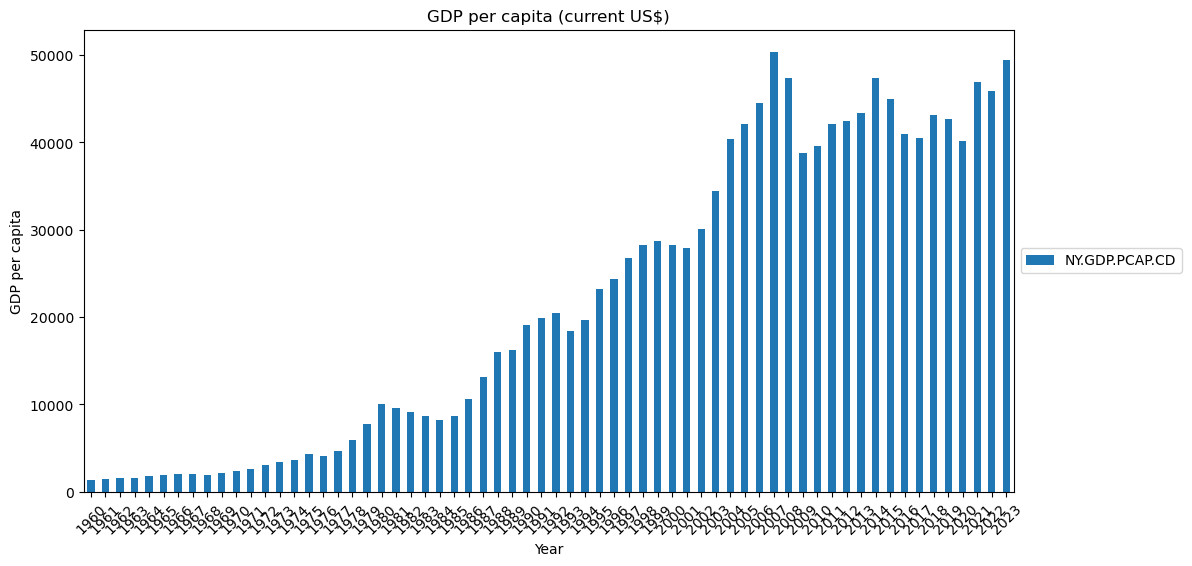

In [8]:
%%pyspark

import pandas as pd
import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM `default`.`gdppercapitaworldbank` where `Country Code` = 'GBR'")

# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[1], df.columns[2]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 

# convery spark df to pandas
pandas_df = df.toPandas()

# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]

# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

pandas_df = pandas_df.rename(columns={'Indicator Code': 'Year'})

df_transposed = pandas_df.set_index('Year').T


df_transposed.plot(kind='bar', stacked=True, figsize=(12, 6))


# Customize plot
plt.title('GDP per capita (current US$)')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



## Life expectancy at 60 based on male, female and both sex

StatementMeta(ghparkcluster, 47, 10, Finished, Available, Finished)

+------+----------------+
|Period|FactValueNumeric|
+------+----------------+
|2000  |77.86           |
|2001  |77.95           |
|2002  |78.08           |
|2003  |78.15           |
|2004  |78.68           |
|2005  |78.91           |
|2006  |79.23           |
|2007  |79.42           |
|2008  |79.54           |
|2009  |80.03           |
|2010  |80.25           |
|2011  |80.64           |
|2012  |80.64           |
|2013  |80.69           |
|2014  |80.94           |
|2015  |80.66           |
|2016  |80.81           |
|2017  |80.92           |
|2018  |80.62           |
|2019  |81.22           |
|2020  |80.14           |
|2021  |80.1            |
+------+----------------+



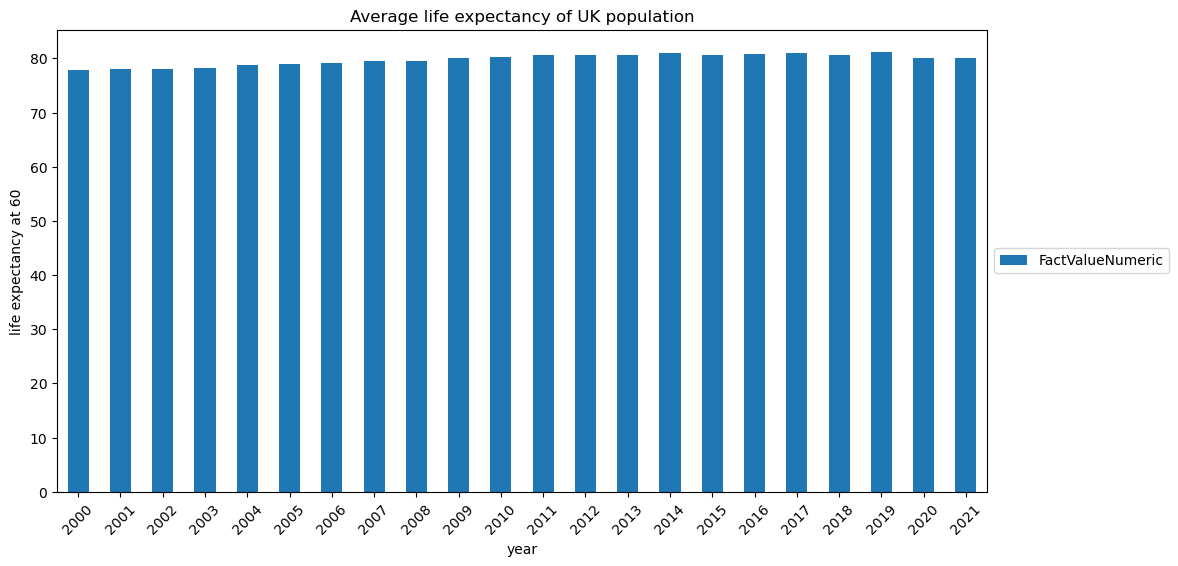

In [9]:
%%pyspark
import pandas as pd
import matplotlib.pyplot as plt
df = spark.sql("SELECT * FROM `default`.`lifeexpectancybirthand60` where `Country Code` = 'GBR' and FactValueNumeric >= 60 and Period >= 1999 and Sex5 = 'SEX_BTSX' order by Period")

# select  un-necessary columns to remove
cols_to_drop = [df.columns[0], df.columns[1], df.columns[3], df.columns[4], df.columns[5]] 

# Drop the specified columns
df = df.drop(*cols_to_drop) 

df.show(23, False)

pandas_df = df.toPandas()
# as it is loaded from csv,Identify the columns that need to be converted to numeric
columns_to_convert = list(pandas_df.columns)[1:]

# Convert the specified columns to numeric
for col in columns_to_convert:
    pandas_df[col] = pd.to_numeric(pandas_df[col], errors='coerce')

pandas_df = pandas_df.set_index('Period')

pandas_df.plot(kind='bar', stacked=True, figsize=(12, 6))


# Customize plot
plt.title('Average life expectancy of UK population')
plt.xlabel('year')
plt.ylabel('life expectancy at 60')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## UK Primary Health Expenses

In [10]:
%%pyspark
from pyspark.sql import functions as F
df = spark.sql('SELECT * FROM `default`.`phcexpendituretrends` where Countries like "%United%"')
df.show(10)
# select  un-necessary columns to remove
cols_to_drop = [df.columns[1]] 
# Drop the specified columns
df = df.drop(*cols_to_drop) 
df.show(10)

# Get the year columns dynamically
year_columns = [col for col in df.columns if col != "Countries"]

# Create the stack expression dynamically
stack_expr = "stack(" + str(len(year_columns)) + ", "

for year_col in year_columns:
    stack_expr += f"'{year_col}', `{year_col}`, "
stack_expr = stack_expr[:-2] + ") as (Year, Value)" #Remove trailing comma and space and close stack expression

# Transpose the DataFrame
transposed_df = df.select("Countries", F.expr(stack_expr)).where("Value is not null")

# Rename the "Year" column
transposed_df = transposed_df.withColumnRenamed("Countries", "Category")

# Transpose the DataFrame
transposed_df = df.select("Countries", F.expr(stack_expr)).where("Value is not null")

transposed_df = transposed_df.drop(*[transposed_df.columns[0]] ) 

transposed_df.show(10)


StatementMeta(ghparkcluster, 47, 11, Finished, Available, Finished)

+--------------------+--------------------+-----+-----+-----+-----+-----+-----+-----+----+
|           Countries|          Indicators| 2016| 2017| 2018| 2019| 2020| 2021| 2022|2023|
+--------------------+--------------------+-----+-----+-----+-----+-----+-----+-----+----+
|United Kingdom of...|Primary Health Ca...|1,499|1,457|1,597|1,587|1,795|2,348|1,906|null|
+--------------------+--------------------+-----+-----+-----+-----+-----+-----+-----+----+

+--------------------+-----+-----+-----+-----+-----+-----+-----+----+
|           Countries| 2016| 2017| 2018| 2019| 2020| 2021| 2022|2023|
+--------------------+-----+-----+-----+-----+-----+-----+-----+----+
|United Kingdom of...|1,499|1,457|1,597|1,587|1,795|2,348|1,906|null|
+--------------------+-----+-----+-----+-----+-----+-----+-----+----+

+----+-----+
|Year|Value|
+----+-----+
|2016|1,499|
|2017|1,457|
|2018|1,597|
|2019|1,587|
|2020|1,795|
|2021|2,348|
|2022|1,906|
+----+-----+



## UK GDP price index (100 in 2022)

In [11]:
%%pyspark
df = spark.sql("SELECT * FROM `default`.`ukgdppriceindex2022is100` order by Indicators")
df.show(10)

# Get the year columns dynamically
year_columns = [col for col in df.columns if col != "Indicators"]

# Create the stack expression dynamically
stack_expr = "stack(" + str(len(year_columns)) + ", "

for year_col in year_columns:
    stack_expr += f"'{year_col}', `{year_col}`, "
stack_expr = stack_expr[:-2] + ") as (Year, Value)" #Remove trailing comma and space and close stack expression

# Transpose the DataFrame
transposed_df = df.select("Indicators", F.expr(stack_expr)).where("Value is not null")

# Rename the "Year" column
transposed_df = transposed_df.withColumnRenamed("CouIndicatorsntries", "Category")

# Transpose the DataFrame
transposed_df = df.select("Indicators", F.expr(stack_expr)).where("Value is not null")

transposed_df = transposed_df.drop(*[transposed_df.columns[0]] ) 

transposed_df.show(24)


StatementMeta(ghparkcluster, 47, 12, Finished, Available, Finished)

+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|          Indicators|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023|
+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Gross domestic pr...|  62|  62|  64|  65|  67|  69|  71|  72|  75|  76|  78|  79|  80|  82|  83|  84|  85|  87|  89|  91|  95|  95| 100| 107|
+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+

+----+-----+
|Year|Value|
+----+-----+
|2000|   62|
|2001|   62|
|2002|   64|
|2003|   65|
|2004|   67|
|2005|   69|
|2006|   71|
|2007|   72|
|2008|   75|
|2009|   76|
|2010|   78|
|2011|   79|
|2012|   80|
|2013|   82|
|2014|   83|
|2015|   84|
|2016|   85|
|2017|   87|
|2018|   89

## UK NET Migration

In [12]:
%%pyspark
df = spark.sql("SELECT * FROM `default`.`uknetmigration` where Time > 1999")
df = df.drop(*[df.columns[0]] ) 
df.show(24)

StatementMeta(ghparkcluster, 47, 13, Finished, Available, Finished)

+----+------+
|Time| Value|
+----+------+
|2000|153917|
|2001|175133|
|2002|203577|
|2003|211846|
|2004|276077|
|2005|308279|
|2006|288923|
|2007|309385|
|2008|263390|
|2009|249639|
|2010|274811|
|2011|228773|
|2012|172088|
|2013|237272|
|2014|306091|
|2015|347839|
|2016|324649|
|2017|272311|
|2018|259744|
|2019|232727|
|2020|144221|
|2021|462967|
|2022|487029|
|2023|445523|
+----+------+
only showing top 24 rows



## UK population by age

StatementMeta(ghparkcluster, 47, 14, Finished, Available, Finished)

+---+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|Age|2000  |2001  |2002  |2003  |2004  |2005  |2006  |2007  |2008  |2009  |2010  |2011  |2012  |2013  |2014  |2015  |2016  |2017  |2018  |2019  |2020  |2021  |2022  |
+---+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|0  |682385|662662|661786|679910|704450|716331|734035|757429|788225|782726|791801|799686|810270|789278|773792|771325|776812|756135|736831|718410|698956|675503|694401|
|1  |701642|679455|664800|662639|679406|704755|716092|737641|758643|787962|781631|789910|804353|813213|792690|776857|774080|777784|755272|736596|719804|702771|690758|
|2  |712124|698903|682505|667850|663651|680794|704383|717749|740782|759942|788659|782209|793396|807232|815304|794490|778370|773200|776393|753572|733178|719432|716737

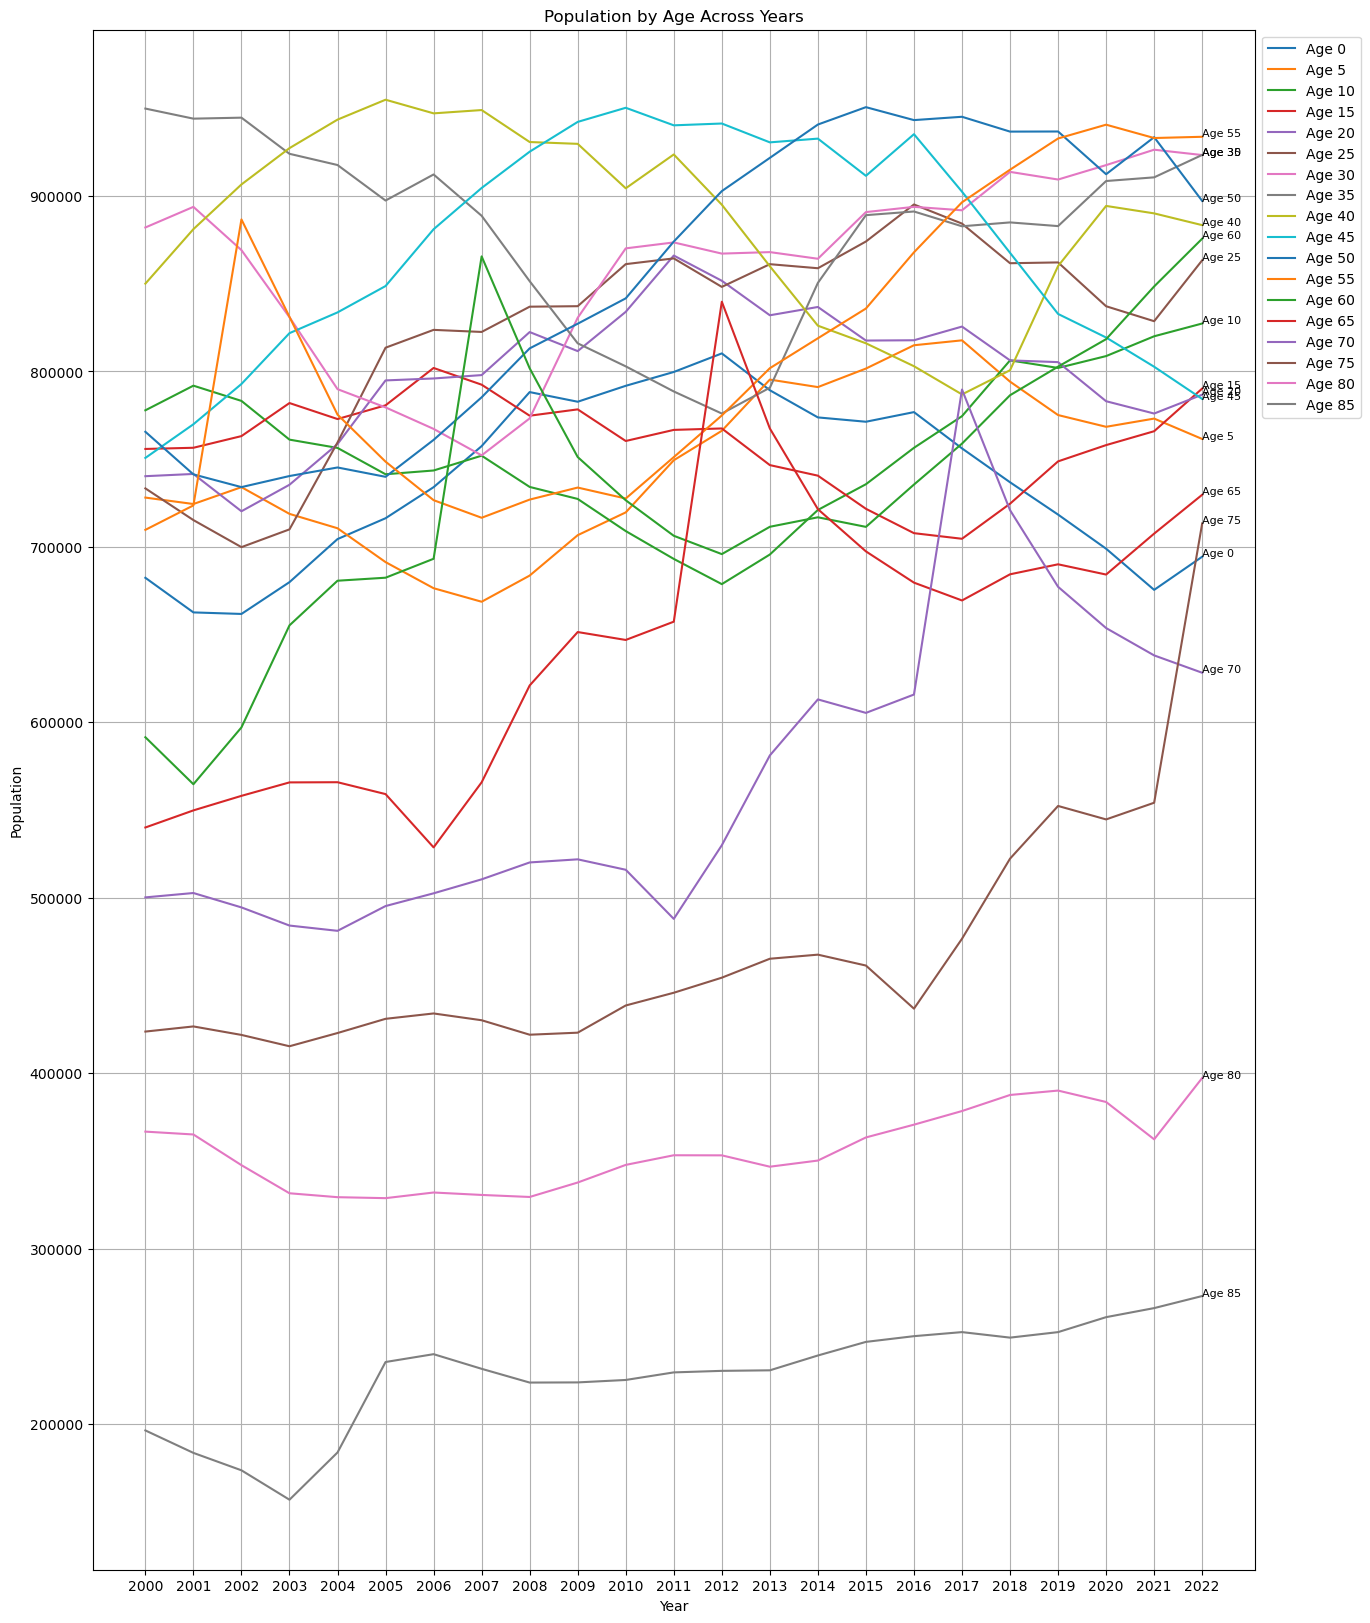

In [13]:
%%pyspark

import matplotlib.pyplot as plt
import pandas as pd

# SQL query to select the data
sql = "SELECT `Age`, `2000`, `2001`, `2002`, `2003`, `2004`, `2005`, `2006`, `2007`, `2008`, `2009`, `2010`, `2011`, `2012`, `2013`, `2014`, `2015`, `2016`, `2017`, `2018`, `2019`, `2020`, `2021`, `2022` FROM ukpopulation_byage_total WHERE Age < 90"

# Execute the query and get the DataFrame
df = spark.sql(sql)

# Show the DataFrame
df.show(10, False)

# Convert the Spark DataFrame to a Pandas DataFrame
pdf = df.toPandas()

# Set the Age column as the index
pdf.set_index('Age', inplace=True)

# Transpose the DataFrame to have years as rows and ages as columns
df_transposed = pdf.T

# Convert all column values to numeric (float or int)
df_transposed = df_transposed.apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))


# Plot the graph
plt.figure(figsize=(15, 20))
# Plot a subset of the data (e.g., every 5th age group)
for age in df_transposed.columns[::5]:
    plt.plot(df_transposed.index.astype(str), df_transposed[age], label=f'Age {age}')
    # Add text annotations for each line (legend on the graph itself)
    plt.annotate(f'Age {age}', (df_transposed.index[-1], df_transposed[age].values[-1]), fontsize=8)

# Add grid lines
plt.grid(True)

# Add title and labels
plt.title('Population by Age Across Years')
plt.xlabel('Year')
plt.ylabel('Population')
# Show legend over the graph itself
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



## World health data

In [14]:
%%pyspark
resultDF = spark.sql('SELECT year,health_exp as health_exp_percentage_gdp,life_expect, maternal_mortality,infant_mortality,neonatal_mortality, under_5_mortality   FROM `default`.`worldhealthdata` where country_code = "GBR" and year > 1999 and  year < 2023')
resultDF.show(24)

schema_name = 'warehouse'
table_name = 'uk_health_data'

spark_sql_schema_Create = f"CREATE SCHEMA IF NOT EXISTS {schema_name};"
spark.sql(spark_sql_schema_Create)

resultDF.write.format("delta").mode("ignore").saveAsTable(f"{schema_name}.{table_name}")

StatementMeta(ghparkcluster, 47, 15, Finished, Available, Finished)

+----+-------------------------+-----------+------------------+----------------+------------------+-----------------+
|year|health_exp_percentage_gdp|life_expect|maternal_mortality|infant_mortality|neonatal_mortality|under_5_mortality|
+----+-------------------------+-----------+------------------+----------------+------------------+-----------------+
|2000|               7.12928009|77.74146341|                11|             5.6|               3.8|              6.5|
|2001|               7.34416342|77.99268293|                11|             5.5|               3.7|              6.4|
|2002|               7.65009499|78.14390244|                11|             5.4|               3.6|              6.3|
|2003|               8.05579185|78.44634146|                11|             5.3|               3.6|              6.2|
|2004|               8.30715179|78.74634146|                11|             5.2|               3.5|              6.1|
|2005|               8.36301231|79.04878049|            

In [15]:
df = spark.sql("SHOW schemas;")
df.show()

StatementMeta(ghparkcluster, 47, 16, Finished, Available, Finished)

+---------+
|namespace|
+---------+
|  default|
|warehouse|
+---------+

